## GRIP The Sparks Foundation
## Task-2 :  
* <font size=4px>From the ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.</font>

<font size=3px><b>By: Bhaveshkumar Rathod</b></font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### **Importing Dataset**

In [2]:
data=pd.read_csv(r'Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### **Understanding the data**

In [3]:
data.shape

(150, 6)

In [4]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
data.isna().any()   #checking missing value

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [6]:
data.describe()   #as we can see there is no outlier

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### **Visualisation of the data**

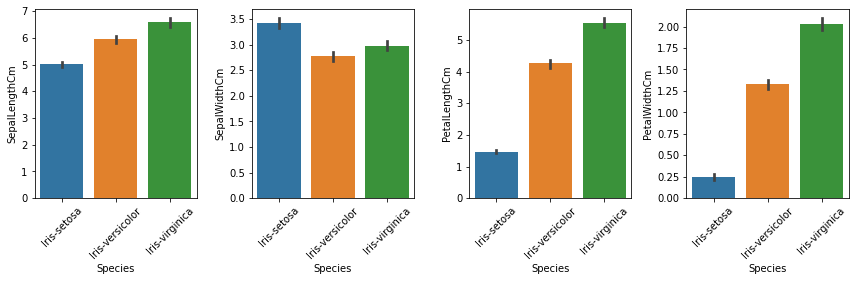

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
sns.barplot(x='Species',y='SepalLengthCm',data=data)
plt.xticks(rotation='45')

plt.subplot(1,4,2)
sns.barplot(x='Species',y='SepalWidthCm',data=data)
plt.xticks(rotation='45')

plt.subplot(1,4,3)
sns.barplot(x='Species',y='PetalLengthCm',data=data)
plt.xticks(rotation='45')

plt.subplot(1,4,4)
sns.barplot(x='Species',y='PetalWidthCm',data=data)
plt.xticks(rotation='45')

plt.tight_layout()

In [15]:
X=data.iloc[:,1:5].values
y=data.iloc[:,-1].values

### **Finding the optimum number of clusters for K-means clustering**

In [16]:
from sklearn.cluster import KMeans
wcss=[]


for i in range(1,11):
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


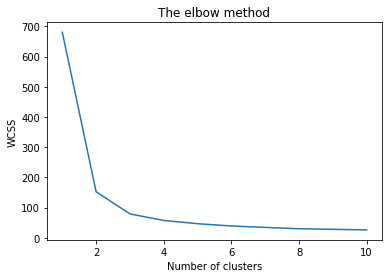

In [17]:
sns.lineplot(x=range(1, 11), y=wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### **K-Means Clustering**

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

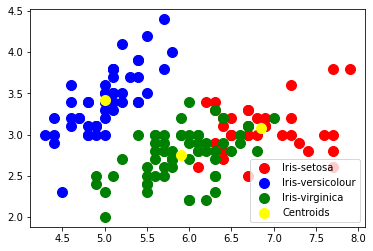

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.show()